Number of training examples =  270

  first  27 training examples
[  Input_features  ]     [Target_output]
[ 0.96957192 -2.04219767] [0. 1.]
[-1.17800966  1.70551049] [1. 0.]
[-0.69675528  0.9087242 ] [1. 0.]
[-0.84367788  0.95026284] [1. 0.]
[ 0.72723877 -1.61687029] [0. 1.]
[-1.06200566  1.53211713] [1. 0.]
[ 0.54478888 -1.48873039] [0. 1.]
[0.58699126 0.7784088 ] [1. 0.]
[-0.5749989   0.06757906] [0. 1.]
[ 0.71208295 -0.90792921] [0. 1.]
[-1.02645029  0.90272584] [1. 0.]
[-1.77158528  0.09002746] [1. 0.]
[-1.02916225  1.37715034] [1. 0.]
[-1.20795808  0.84566164] [1. 0.]
[-1.61846304 -0.62135995] [1. 0.]
[-0.21140754  1.41593419] [1. 0.]
[-1.51688654  0.73088409] [1. 0.]
[-0.15272752 -0.52925753] [0. 1.]
[-0.55583367  1.03732995] [1. 0.]
[-1.91348848 -0.44486759] [1. 0.]
[-0.61969691 -0.67939615] [0. 1.]
[1.65001795 0.04698408] [0. 1.]
[-0.7295897   1.26147714] [1. 0.]
[-0.12690729  0.80364716] [1. 0.]
[ 0.62199951 -0.47529058] [1. 0.]
[ 0.50500902 -1.35037449] [0. 1.]
[ 1.10563392 

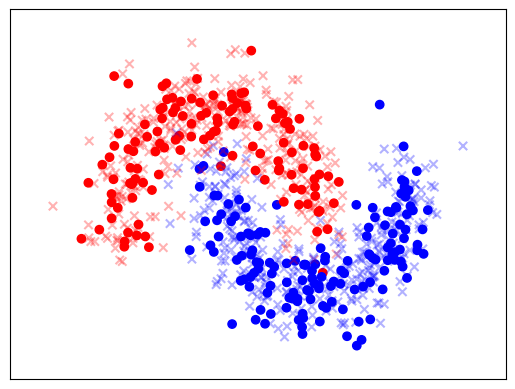

In [1]:
%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
Xmoon, y_moon = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
Xmoon = StandardScaler().fit_transform(Xmoon)
Xmoon_train, Xmoon_test, y_moon_train, y_moon_test = train_test_split(Xmoon, y_moon, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Ymoon_train_OneHot = np.eye(2)[y_moon_train]
Ymoon_test_OneHot = np.eye(2)[y_moon_test]

# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_moon_train.size)
print()
print("  first ", round(y_moon_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_moon_train.size/10) )):
    print( Xmoon_train[i], Ymoon_train_OneHot[i])

# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = Xmoon[:, 0].min() - .5, Xmoon[:, 0].max() + .5
y_min, y_max = Xmoon[:, 1].min() - .5, Xmoon[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()

MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4,
              hidden_layer_sizes=(1,), learning_rate_init=0.005, max_iter=9,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.67924674
Iteration 2, loss = 1.49375752
Iteration 3, loss = 1.41298318
Iteration 4, loss = 1.36102328
Iteration 5, loss = 1.29945263
Iteration 6, loss = 1.20019137
Iteration 7, loss = 1.05521102
Iteration 8, loss = 0.89532643
Iteration 9, loss = 0.76620016



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(


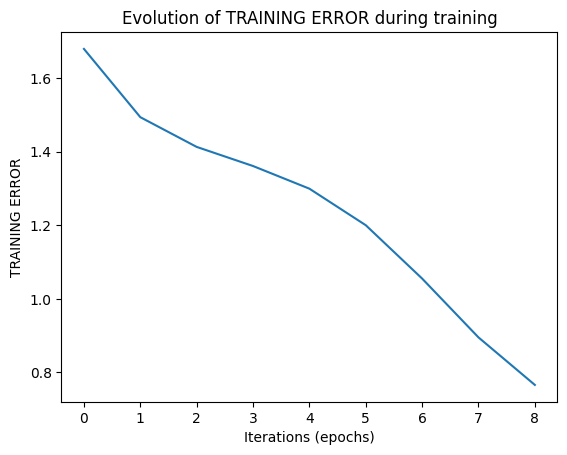

Acuracy (on test set) =  0.8317460317460318


In [2]:
#########################################################
# Create, fit and evaluate a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

# Create the MLP (with specific values for hyper-parameters)
mlp = MLPClassifier(hidden_layer_sizes=(1, ), activation='tanh', solver='sgd',
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005,
                    power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001,
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True,
                    early_stopping=False, validation_fraction=0.2,
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(mlp)
# NB about syntax for hidden layers: hidden_layer_sizes=(H1, ) means ONE hidden layer containing H1 neurons,
#   while hidden_layer_sizes=(H1,H2, ) would mean TWO hidden layers of respective sizes H1 and H2
# NB about iteration: max_iter specifies a number of EPOCHS (= going through all training examples)

# Train the MLP classifier on the training dataset
mlp.fit(Xmoon_train, Ymoon_train_OneHot)
print()

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()

# Evaluate acuracy on TEST data
score = mlp.score(Xmoon_test,Ymoon_test_OneHot)
print("Acuracy (on test set) = ", score)

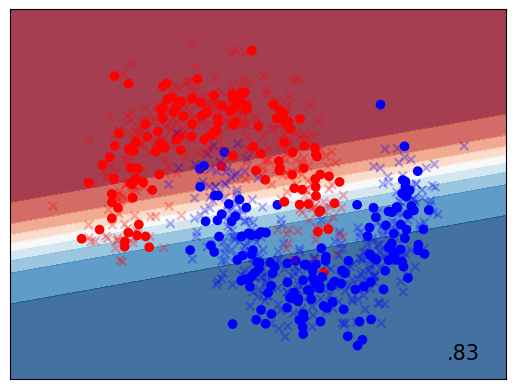

In [3]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
# and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Axis ranges
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.ioff()
plt.show()